In [1]:
from mbdvv.app import app

import numpy as np
from glob import glob
import pandas as pd
from math import ceil
pd.options.display.max_rows = 999

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
def savefig(fig, name, ext='pdf', **kwargs):
    fig.savefig(f'../media/{name}.{ext}', transparent=True, bbox_inches='tight', **kwargs)

In [3]:
def reduced_grad(x):
    return x.rho_grad_norm/(2*(3*np.pi**2)**(1/3)*x.rho*(4/3))

def alpha_kin(x):
    return (x.kin_dens-x.rho_grad_norm**2/(8*x.rho))/(3/10*(3*np.pi**2)**(2/3)*x.rho**(5/3))

In [4]:
with app.context():
    filename = app.get('s66')[0].loc(0)['Water ... Water', 1.0, 'fragment-1'].gridfile

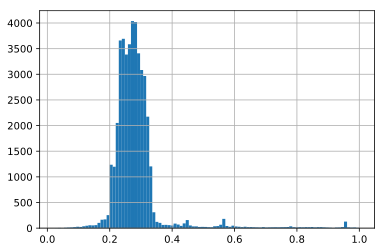

In [5]:
pd.read_hdf(filename).loc[lambda x: x.rho > 0].pipe(reduced_grad).loc[lambda x: x < 1].hist(bins=100);

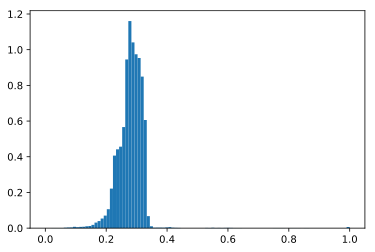

In [6]:
bins = np.linspace(0, 1, 100)
binmids = (bins[1:]+bins[:-1])/2 
subsums = (
    pd.read_hdf(filename)
    .assign(
        vv_pol_w=lambda x: x.vv_pol*x.part_weight,
        binidx=lambda x: np.digitize(reduced_grad(x).clip(bins[0]+1e-10, bins[-1]-1e-10), bins),
    ).groupby('binidx')
    .apply(lambda x: x.vv_pol_w.sum())
)
fig, ax = plt.subplots()
ax.bar(binmids[subsums.index-1], subsums, bins[1]-bins[0]);

In [7]:
with app.context():
    df = app.get('solids')[0]['solids']

In [8]:
all_points = pd.concat(
    dict(df.gridfile.loc[:, 1., 'crystal'].apply(lambda x: pd.read_hdf(x))),
    names=('level', 'i_point')
)

In [9]:
all_points.to_hdf('../data/grid-points.h5', 'solids')

In [10]:
bins = np.linspace(0, 1, 50)
binmids = (bins[1:]+bins[:-1])/2 
subsums = (
    all_points
    .assign(
        vv_pol_w=lambda x: x.vv_pol*x.part_weight,
        binidx=lambda x: np.digitize(reduced_grad(x).clip(bins[0]+1e-10, bins[-1]-1e-10), bins),
    ).groupby('level binidx'.split())
    .apply(lambda x: x.vv_pol_w.sum())
)

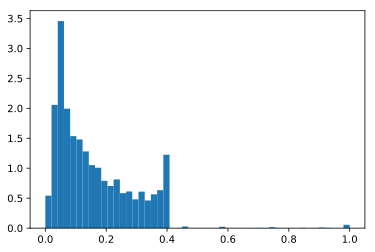

In [11]:
df =  list(subsums.groupby('level'))[0][1]
fig, ax = plt.subplots()
ax.bar(binmids[df.index.get_level_values('binidx')-1], df, bins[1]-bins[0]);

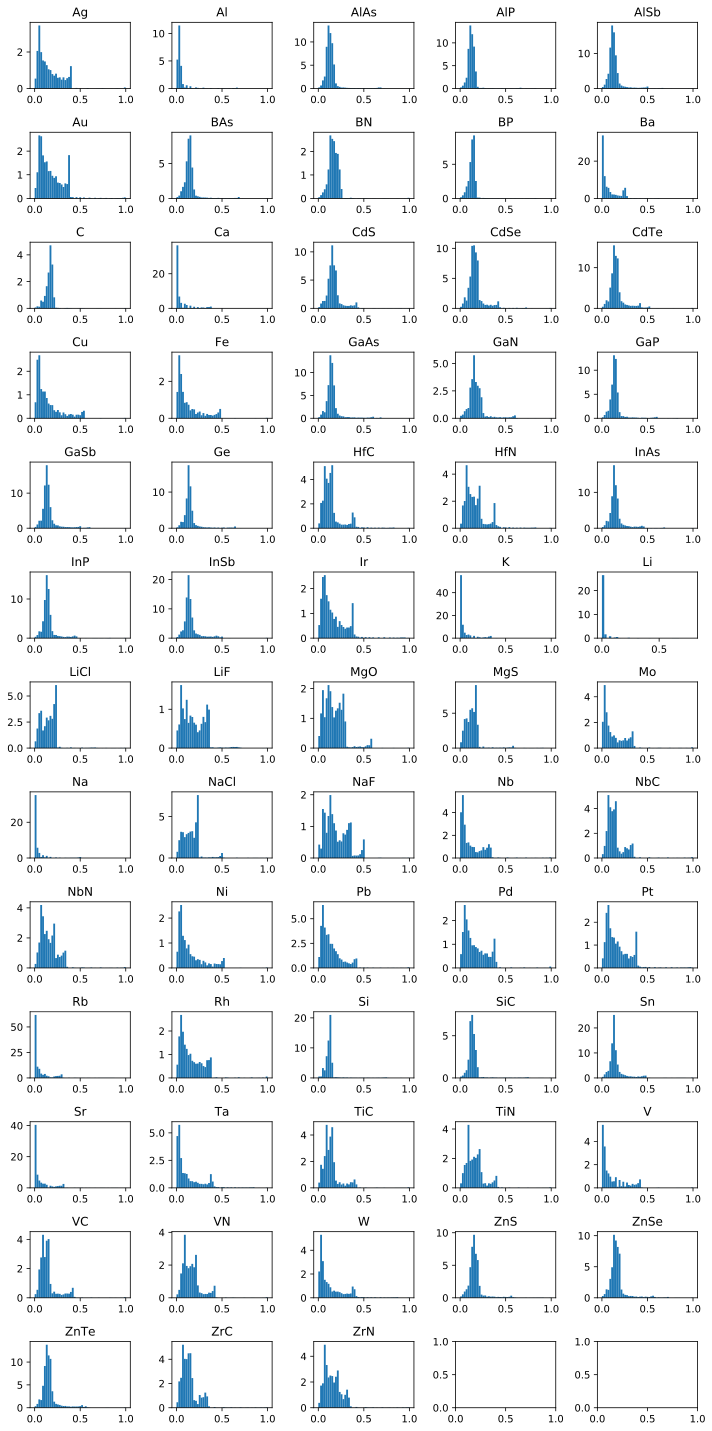

In [12]:
nrow = 5
fig, axes = plt.subplots(ceil(len(subsums.index.levels[0])/5), 5, figsize=(10, 20))
for ax, (label, df) in zip((ax for ax_row in axes for ax in ax_row), subsums.groupby('level')):
    ax.bar(binmids[df.index.get_level_values('binidx')-1], df, bins[1]-bins[0])
    ax.set_title(label)
fig.tight_layout()

In [13]:
savefig(fig, 'alpha-rgrad-hists')

In [14]:
reduced_grad(all_points).groupby('level').describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
Ag,24332.0,0.776559,3.959112,0.000408,0.079952,0.213149,0.351606,72.893193
Al,20756.0,0.425122,0.887920,0.000221,0.030794,0.047748,0.448344,4.962613
AlAs,43848.0,0.510024,1.571261,0.000617,0.105476,0.142157,0.234582,30.803884
AlP,40490.0,0.405187,0.809237,0.001645,0.103979,0.132169,0.175883,6.318436
AlSb,59108.0,0.927823,4.464503,0.002251,0.113912,0.163533,0.479053,87.865813
Au,29190.0,1.434247,12.889762,0.000022,0.095130,0.217714,0.365748,286.855974
BAs,41868.0,0.432443,1.511121,0.000664,0.113024,0.146004,0.195599,30.803860
BN,37128.0,0.289718,0.364107,0.003412,0.124136,0.172491,0.221215,2.070547
BP,38510.0,0.309229,0.585950,0.000221,0.106380,0.135019,0.162677,6.318416


In [15]:
with app.context():
    df = app.get('s66')[0]

In [16]:
all_points = pd.concat(
    dict(df.gridfile.loc[:, 1., 'complex'].apply(lambda x: pd.read_hdf(x) if x else None)),
    names=('level', 'i_point')
)

In [17]:
all_points.to_hdf('../data/grid-points.h5', 's66')

In [18]:
bins = np.linspace(0, 1, 50)
binmids = (bins[1:]+bins[:-1])/2 
subsums = (
    all_points
    .assign(
        vv_pol_w=lambda x: x.vv_pol*x.part_weight,
        binidx=lambda x: np.digitize(reduced_grad(x).clip(bins[0]+1e-10, bins[-1]-1e-10), bins),
    ).groupby('level binidx'.split())
    .apply(lambda x: x.vv_pol_w.sum())
)

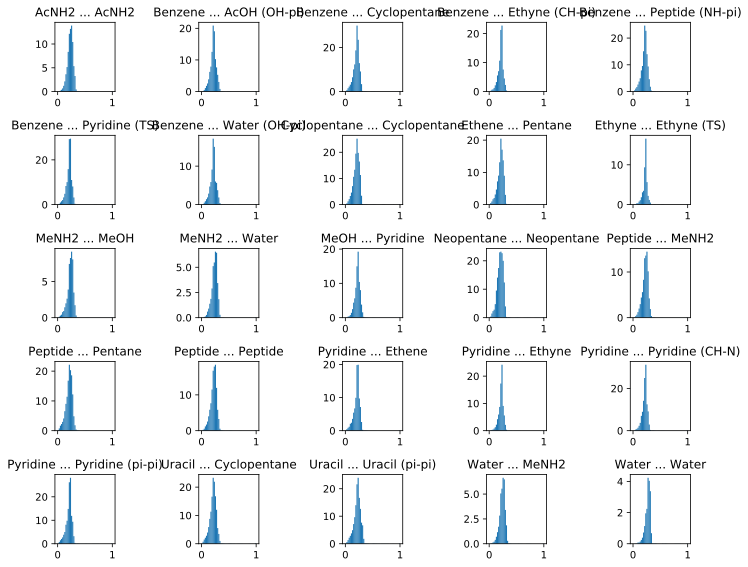

In [19]:
nrow = 4
fig, axes = plt.subplots(ceil(len(subsums.index.levels[0])/5), 5, figsize=(10, 8))
for ax, (label, df) in zip((ax for ax_row in axes for ax in ax_row), subsums.groupby('level')):
    ax.bar(binmids[df.index.get_level_values('binidx')-1], df, bins[1]-bins[0])
    ax.set_title(label)
fig.tight_layout()

In [20]:
reduced_grad(all_points).groupby('level').describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
AcNH2 ... AcNH2,290320.0,-0.037350,2.811865,-276.703317,0.208981,0.241078,0.274292,278.319387
Benzene ... AcOH (OH-pi),324192.0,0.025359,2.484227,-287.263710,0.202788,0.232714,0.271832,77.159415
Benzene ... Cyclopentane,425284.0,0.036475,3.386003,-1127.202418,0.192685,0.222799,0.257293,285.492344
Benzene ... Ethyne (CH-pi),256752.0,0.034471,7.668607,-3697.569069,0.200916,0.225733,0.261080,279.689285
Benzene ... Peptide (NH-pi),384268.0,0.094495,26.889990,-246.427492,0.198673,0.228538,0.264213,16594.274533
Benzene ... Pyridine (TS),371386.0,0.081985,2.854918,-906.590703,0.198834,0.225163,0.258961,206.118277
Benzene ... Water (OH-pi),240734.0,-0.005233,2.760033,-443.429097,0.202765,0.229596,0.272383,52.478323
Cyclopentane ... Cyclopentane,465440.0,0.017905,4.030134,-1559.142556,0.190842,0.224097,0.258136,1414.501461
Ethene ... Pentane,354708.0,-0.034807,10.622197,-3734.071490,0.196013,0.227910,0.260978,4613.605426
